# Air Traffic Data Analysis - Student Exercise
## Inferential Statistics and Regression Analysis

**Student Template - Complete the TODO sections**

In this exercise, you will analyze air traffic data using inferential statistics and regression techniques. Follow the instructions and complete each section marked with `#TODO`.

### Dataset Description:
- **Dom_Pax**: Domestic Air Travel Passengers
- **Int_Pax**: International Air Travel Passengers  
- **Pax**: Total Air Travel Passengers
- **Dom_Flt**: Number of Flights (Domestic)
- **Int_Flt**: Number of Flights (International)
- **Flt**: Number of Flights (Total)
- **Dom_RPM**: Revenue Passenger-miles (Domestic)

## 1. Setup and Data Loading

In [1]:
# TODO: Import necessary libraries
# Hint: You'll need pandas, numpy, matplotlib, seaborn, scipy.stats, and sklearn modules
# Import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
# From scipy import stats
# From sklearn.model_selection import train_test_split
# From sklearn.linear_model import LinearRegression
# From sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# From sklearn.preprocessing import StandardScaler

# Your code here:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Set up plotting style (optional)
plt.style.use('default')
sns.set_palette("husl")

In [2]:
# TODO: Load the dataset
# Hint: Use pd.read_csv() to load 'air_traffic_data.csv'
# If the file doesn't exist, the code below will create sample data for you
from google.colab import files
uploaded = files.upload() #added this to the template as its what we learned.

try:
    # Your code to load the dataset:
    df = pd.read_csv("air traffic.csv") # TODO: Complete this line
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print("Creating sample air traffic data...")
    import numpy as np
    import pandas as pd

    # Create sample data
    np.random.seed(42)
    n_samples = 200

    # Generate correlated data
    dom_flights = np.random.normal(15000, 3000, n_samples)
    int_flights = np.random.normal(8000, 2000, n_samples)

    dom_pax = dom_flights * np.random.normal(12, 2, n_samples) + np.random.normal(0, 10000, n_samples)
    int_pax = int_flights * np.random.normal(15, 3, n_samples) + np.random.normal(0, 15000, n_samples)

    dom_rpm = dom_pax * np.random.normal(800, 100, n_samples)

    # Ensure positive values
    dom_flights = np.abs(dom_flights)
    int_flights = np.abs(int_flights)
    dom_pax = np.abs(dom_pax)
    int_pax = np.abs(int_pax)
    dom_rpm = np.abs(dom_rpm)

    df = pd.DataFrame({
        'Dom_Flt': dom_flights.astype(int),
        'Int_Flt': int_flights.astype(int),
        'Flt': (dom_flights + int_flights).astype(int),
        'Dom_Pax': dom_pax.astype(int),
        'Int_Pax': int_pax.astype(int),
        'Pax': (dom_pax + int_pax).astype(int),
        'Dom_RPM': dom_rpm.astype(int)
    })

    print("Sample data created successfully!")
    print(f"Shape: {df.shape}")

    #Dataset Analysis: 249 Rows, 17 Columns

Saving air traffic.csv to air traffic.csv
Dataset loaded successfully!
Shape: (249, 17)


## 2. Exploratory Data Analysis

In [3]:
# TODO: Display basic information about the dataset
# Hint: Use df.info(), df.head(), and df.describe() to explore the data

print("Dataset Info:")
# Your code here:
df.info()

print("\nFirst 5 rows:")
# Your code here:
df.head(5)

print("\nBasic Statistics:")
# Your code here:
df.describe()

#Initial Analysis: There are 249 entries between 2003 and 2023.
#Numeric Variables: Dom_Pax, Int_Pax, Pax, Dom_Flt, Int_Flt, Flt
#Data Types: Floats, Integers, Objects (Numeric stored as objects)
#No missing values, but will need to double check because of NaN

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     249 non-null    int64  
 1   Month    249 non-null    int64  
 2   Dom_Pax  249 non-null    object 
 3   Int_Pax  249 non-null    object 
 4   Pax      249 non-null    object 
 5   Dom_Flt  249 non-null    object 
 6   Int_Flt  249 non-null    object 
 7   Flt      249 non-null    object 
 8   Dom_RPM  249 non-null    object 
 9   Int_RPM  249 non-null    object 
 10  RPM      249 non-null    object 
 11  Dom_ASM  249 non-null    object 
 12  Int_ASM  249 non-null    object 
 13  ASM      249 non-null    object 
 14  Dom_LF   249 non-null    float64
 15  Int_LF   249 non-null    float64
 16  LF       249 non-null    float64
dtypes: float64(3), int64(2), object(12)
memory usage: 33.2+ KB

First 5 rows:

Basic Statistics:


,Year,Month,Dom_LF,Int_LF,LF
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2012.879518,6.445783,79.938394,77.304940,79.286305
std,6.002817,3.442803,8.860562,10.907145,8.895700
min,2003.000000,1.000000,13.090000,23.150000,13.830000
25%,2008.000000,3.000000,77.720000,76.430000,76.940000
50%,2013.000000,6.000000,82.120000,79.910000,81.580000
75%,2018.000000,9.000000,85.240000,82.930000,84.070000
max,2023.000000,12.000000,89.960000,89.440000,89.140000


In [4]:
# TODO: Check for missing values and handle them if necessary
# Hint: Use df.isnull().sum() to check for missing values
# If there are missing values, decide whether to drop them (dropna()) or fill them (fillna())

print("Missing values:")
# Your code here:
df.isnull().sum()

df.isnull().values.any() #to check for my dreaded NaN (result is FALSE yay)

#there are no missing values

# Handle missing values if any (uncomment and complete if needed)
# if df.isnull().sum().sum() > 0:
#     print("\nHandling missing values...")
#     df = # TODO: Complete this line (use dropna() or fillna())
#     print(f"New shape after handling missing values: {df.shape}")

Missing values:


np.False_

In [6]:
#This was not in the template, but we need to convert the columns. I'm not sure why it wasn't included.

for col in df.select_dtypes(include='object'):
  df[col] = df[col].str.replace(',', '')
  df[col] = pd.to_numeric(df[col], errors='coerce')


#now i want to see if there are any NaNs
df.isna().sum()

df = df.sort_values(by=["Year", "Month"])



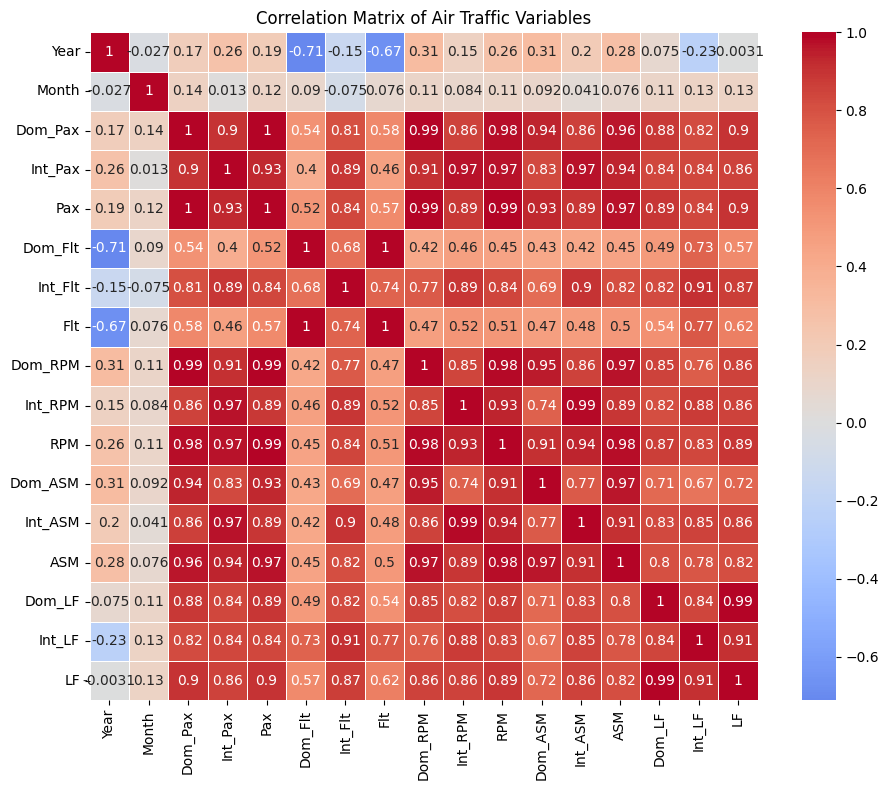

Strongest correlations: Dom_Pax  Pax        0.997455
Pax      Dom_Pax    0.997455
Flt      Dom_Flt    0.997068
Dom_Flt  Flt        0.997068
LF       Dom_LF     0.989608
Dom_LF   LF         0.989608
Pax      Dom_RPM    0.989246
Dom_RPM  Pax        0.989246
Pax      RPM        0.988162
RPM      Pax        0.988162
dtype: float64


In [7]:
# TODO: Create and analyze correlation matrix
# Hint: Use df.corr() to calculate correlations and sns.heatmap() to visualize
import seaborn as sns #just added this

plt.figure(figsize=(10, 8))
# Calculate correlation matrix:
correlation_matrix = df.corr() # TODO: Complete this line

# Create heatmap:
# TODO: Use sns.heatmap() with parameters: annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5

heatmap = sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5) #creating heatmap
plt.title('Correlation Matrix of Air Traffic Variables')
plt.tight_layout()
plt.show()

# TODO: Find and print the strongest correlations
# Hint: Look at the correlation matrix values (excluding diagonal)
strongest = correlation_matrix.unstack()
strongest = strongest[strongest < 1].sort_values(ascending=False) #removing self - match

print(f"Strongest correlations: {strongest.head(10)}") #trying to reduce number of lines, but we want to see the top 10 strongest correlations sorted from highest to lowest
#
# Your analysis here: The strongest is correlation is between passenger and domestic passenger, which I believe means that most passengers are domestic passengers, most flights are domestic flights, etc. There's also a high correlation between domestic load factors and load factors, more broadly. Passenger, flights, and revenue miles all seem to be closely linekd. I'm surprised that international didn't seem to be incorporated at all.

## 3. Hypothesis Testing

In [8]:
# TODO: Hypothesis Test 1 - Compare domestic and international passengers
# Hint: Use stats.ttest_ind() to perform independent t-test

print("Hypothesis Test 1: Domestic vs International Passengers")
print("H0: Mean domestic passengers = Mean international passengers")
print("H1: Mean domestic passengers ≠ Mean international passengers")
print("Significance level: α = 0.05")

# Perform the t-test:
t_stat, p_value = stats.ttest_ind(df['Dom_Pax'], df['Int_Pax']) # TODO: Complete this line using stats.ttest_ind()

print(f"\nResults:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# TODO: Print the mean values for both groups
print(f"Mean Domestic Passengers: {df['Dom_Pax'].mean():.0f}")
print(f"Mean International Passengers: {df['Int_Pax'].mean():.0f}")

# TODO:
print("\nAnalysis: Based on the results, we can say that there are roughly 55M domestic passengers, which is significantly higher than the 7.3M international passengers. The P-value is 0, which is less than the significance level (.05), suggesting that we must reject the null hypothesis. The T-Statistic is 70.9547, which means there is a large difference between the two groups (i.e. what I already knew: domestic travel is higher than international travel")
# Hint: Compare p_value with alpha (0.05) to make a decision
alpha = 0.05
if p_value < alpha:
    # TODO: Complete the conclusion for rejecting H0
    print(f"\nConclusion: Reject H0 (p < {alpha})")
    print("Domestic pax volume is much higher than international pax volume. This is stasticially significant.")
else:
    # TODO: Complete the conclusion for failing to reject H0
    print(f"\nConclusion: Fail to reject H0 (p >= {alpha})")
    print("There is no statistical significant difference between domestic and international pax volumes.")

Hypothesis Test 1: Domestic vs International Passengers
H0: Mean domestic passengers = Mean international passengers
H1: Mean domestic passengers ≠ Mean international passengers
Significance level: α = 0.05

Results:
T-statistic: 70.9547
P-value: 0.000000
Mean Domestic Passengers: 55209710
Mean International Passengers: 7392209

Analysis: Based on the results, we can say that there are roughly 55M domestic passengers, which is significantly higher than the 7.3M international passengers. The P-value is 0, which is less than the significance level (.05), suggesting that we must reject the null hypothesis. The T-Statistic is 70.9547, which means there is a large difference between the two groups (i.e. what I already knew: domestic travel is higher than international travel

Conclusion: Reject H0 (p < 0.05)
Domestic pax volume is much higher than international pax volume. This is stasticially significant.


In [9]:
# TODO: Hypothesis Test 2 - Test correlation between total passengers and total flights
# Hint: Use stats.pearsonr() to test correlation significance

print("\nHypothesis Test 2: Correlation between Total Passengers and Total Flights")
print("H0: There is no correlation between total passengers and total flights (ρ = 0)")
print("H1: There is a correlation between total passengers and total flights (ρ ≠ 0)")
print("Significance level: α = 0.05")

# Perform correlation test:
correlation_coef, p_value_corr = stats.pearsonr(df['Pax'], df['Flt']) # TODO: Complete this line using stats.pearsonr()

print(f"\nResults:")
print(f"Correlation coefficient: {correlation_coef:.4f}")
print(f"P-value: {p_value_corr:.6f}")

# TODO: Interpret the correlation test results
# Hint: Compare p_value_corr with alpha and interpret the correlation coefficient
if p_value_corr < alpha:
    print(f"\nConclusion: Reject H0 (p < {alpha})")
    print(f"The correlation coeffencient is .5698, which implies a somewhat positive relationship between total pax and total flights. However, the P-Value is 0, which means we should reject the NULL hypothesis as there is a significant positive correlation - as in if flights increase, pax # increases.")
    # TODO: Add interpretation about positive/negative correlation
    if correlation_coef > 0:
        print("Positive correlation means that as the # of flights increases, so too, does the # of pax.")
    else:
        print("Negative correlation means that as the # of flights increases, the # of pax decreases.")
else:
    print(f"\nConclusion: Fail to reject H0 (p >= {alpha})")
    print("There is no stasticially significant correlation between total pax and total flights.")


Hypothesis Test 2: Correlation between Total Passengers and Total Flights
H0: There is no correlation between total passengers and total flights (ρ = 0)
H1: There is a correlation between total passengers and total flights (ρ ≠ 0)
Significance level: α = 0.05

Results:
Correlation coefficient: 0.5698
P-value: 0.000000

Conclusion: Reject H0 (p < 0.05)
The correlation coeffencient is .5698, which implies a somewhat positive relationship between total pax and total flights. However, the P-Value is 0, which means we should reject the NULL hypothesis as there is a significant positive correlation - as in if flights increase, pax # increases.
Positive correlation means that as the # of flights increases, so too, does the # of pax.


## 4. Simple Linear Regression

In [10]:
# TODO: Build a simple linear regression model
# Goal: Predict Total Passengers from Total Flights
# Hint: Use sklearn's LinearRegression class

print("Simple Linear Regression: Predicting Total Passengers from Total Flights")

# Prepare the data:
X_simple = df[['Flt']] # TODO: Select the feature column (Total Flights)
y_simple = df['Pax']# TODO: Select the target column (Total Passengers)

# Split the data:
# TODO: Use train_test_split with test_size=0.2, random_state=42
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42,
)

# Create and train the model:
simple_model = LinearRegression()# TODO: Create LinearRegression instance
simple_model.fit(X_train_simple, y_train_simple) # TODO: Fit the model using X_train_simple and y_train_simple


# Make predictions:
y_pred_simple = simple_model.predict(X_test_simple)# TODO: Predict on test data

# TODO: Calculate performance metrics
# Hint: Use r2_score, mean_squared_error, mean_absolute_error
r2_simple = r2_score (y_test_simple, y_pred_simple) # TODO: Calculate R² score
mse_simple = mean_squared_error(y_test_simple, y_pred_simple) # TODO: Calculate MSE
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple) # TODO: Calculate MAE
rmse_simple = np.sqrt(mse_simple) # TODO: Calculate RMSE (square root of MSE)

print(f"\nModel Performance:")
print(f"R² Score: {r2_simple:.4f}")
print(f"Mean Squared Error: {mse_simple:.2f}")
print(f"Root Mean Squared Error: {rmse_simple:.2f}")
print(f"Mean Absolute Error: {mae_simple:.2f}")

# TODO: Print the model equation
# Hint: Use simple_model.intercept_ and simple_model.coef_[0]
print(f"\nModel Equation: Passengers = {simple_model.intercept_:.2f} + {simple_model.coef_[0]:.2f} × Flights")

Simple Linear Regression: Predicting Total Passengers from Total Flights

Model Performance:
R² Score: -0.0092
Mean Squared Error: 110855922051702.88
Root Mean Squared Error: 10528813.90
Mean Absolute Error: 9262992.73

Model Equation: Passengers = 13253573.91 + 63.71 × Flights


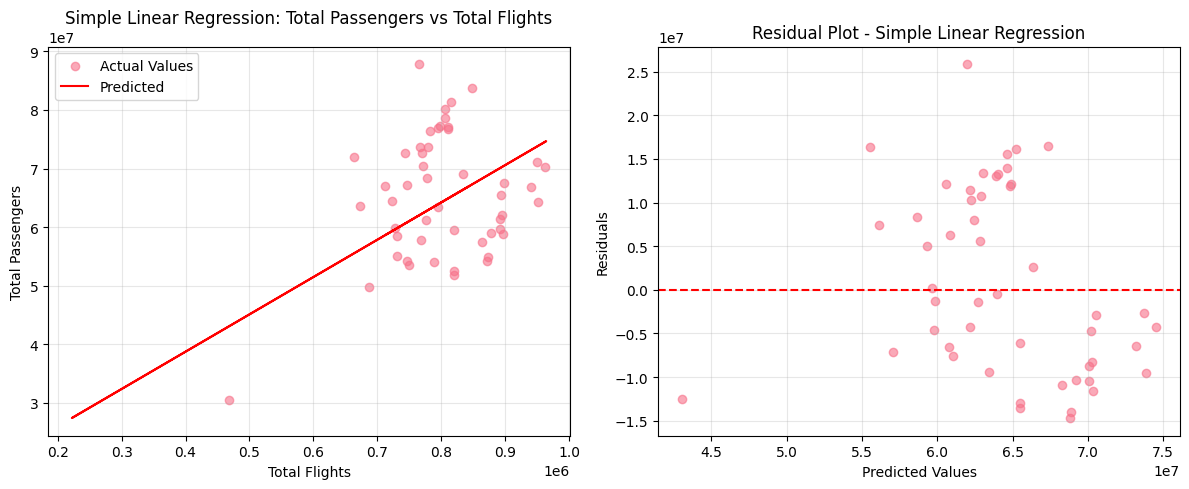

In [11]:
# TODO: Visualize the simple linear regression results
# Create two plots: scatter plot with regression line and residual plot

# Plot 1: Scatter plot with regression line
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# TODO: Create scatter plot of actual vs predicted values
# Hint: Use plt.scatter() for actual and predicted points, and plt.plot() for the line
plt.scatter(X_test_simple['Flt'], y_test_simple, alpha = 0.6, label='Actual Values') #actual data
plt.plot(df['Flt'], simple_model.predict(df[['Flt']]), color='red', label='Predicted')


plt.xlabel('Total Flights')
plt.ylabel('Total Passengers')
plt.title('Simple Linear Regression: Total Passengers vs Total Flights')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residual plot
plt.subplot(1, 2, 2)
# TODO: Calculate residuals and create residual plot
# Hint: residuals = actual - predicted
residuals = y_test_simple - y_pred_simple# TODO: Calculate residuals

# TODO: Create scatter plot of predicted vs residuals
plt.scatter(y_pred_simple, residuals, alpha=0.6)

plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Simple Linear Regression')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Multiple Linear Regression

In [12]:
# TODO: Build a multiple linear regression model
# Goal: Predict Total Passengers using multiple features
# Hint: Avoid using Pax in features since that's our target (multicollinearity)

print("Multiple Linear Regression: Predicting Total Passengers from Multiple Features")

# TODO: Select appropriate features
# Hint: Use columns like Dom_Pax, Int_Pax, Dom_Flt, Int_Flt, Dom_RPM (avoid Pax and Flt)
feature_columns = ['Dom_Pax', 'Int_Pax', 'Dom_Flt', 'Int_Flt', 'Dom_RPM'] # TODO: List of feature column names

X_multiple = df[feature_columns]# TODO: Select features from dataframe
y_multiple = df['Pax'] # TODO: Select target variable (Total Passengers)

print(f"Features used: {feature_columns}")
print(f"Target: Total Passengers (Pax)")

# TODO: Split the data
# Hint: Use train_test_split with test_size=0.2, random_state=42
X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(
    X_multiple, y_multiple, test_size=0.2, random_state=42,)

# TODO: Apply feature scaling (recommended for multiple regression)
# Hint: Use StandardScaler
scaler = StandardScaler() # TODO: Create StandardScaler instance
X_train_mult_scaled = scaler.fit_transform(X_train_mult) # TODO: Fit and transform training data
X_test_mult_scaled = scaler.transform(X_test_mult)# TODO: Transform test data (don't fit again!)

# TODO: Create and train the multiple regression model
multiple_model = LinearRegression()# TODO: Create LinearRegression instance
# TODO: Fit the model
multiple_model.fit(X_train_mult_scaled, y_train_mult)

# TODO: Make predictions
y_pred_mult = multiple_model.predict(X_test_mult_scaled) # TODO: Predict on scaled test data

# TODO: Calculate performance metrics
r2_mult = r2_score(y_test_mult, y_pred_mult) # TODO: Calculate R² score
mse_mult = mean_squared_error(y_test_mult, y_pred_mult)# TODO: Calculate MSE
mae_mult = mean_absolute_error(y_test_mult, y_pred_mult) # TODO: Calculate MAE
rmse_mult = np.sqrt(mse_mult)# TODO: Calculate RMSE

print(f"\nModel Performance:")
print(f"R² Score: {r2_mult:.4f}")
print(f"Mean Squared Error: {mse_mult:.2f}")
print(f"Root Mean Squared Error: {rmse_mult:.2f}")
print(f"Mean Absolute Error: {mae_mult:.2f}")

# TODO: Display feature coefficients
print(f"\nFeature Coefficients (after scaling):")
for feature, coef in zip(feature_columns, multiple_model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {multiple_model.intercept_:.2f}")

Multiple Linear Regression: Predicting Total Passengers from Multiple Features
Features used: ['Dom_Pax', 'Int_Pax', 'Dom_Flt', 'Int_Flt', 'Dom_RPM']
Target: Total Passengers (Pax)

Model Performance:
R² Score: 1.0000
Mean Squared Error: 0.00
Root Mean Squared Error: 0.00
Mean Absolute Error: 0.00

Feature Coefficients (after scaling):
Dom_Pax: 10689417.6519
Int_Pax: 2059258.5907
Dom_Flt: 0.0000
Int_Flt: 0.0000
Dom_RPM: 0.0000
Intercept: 61921705.70


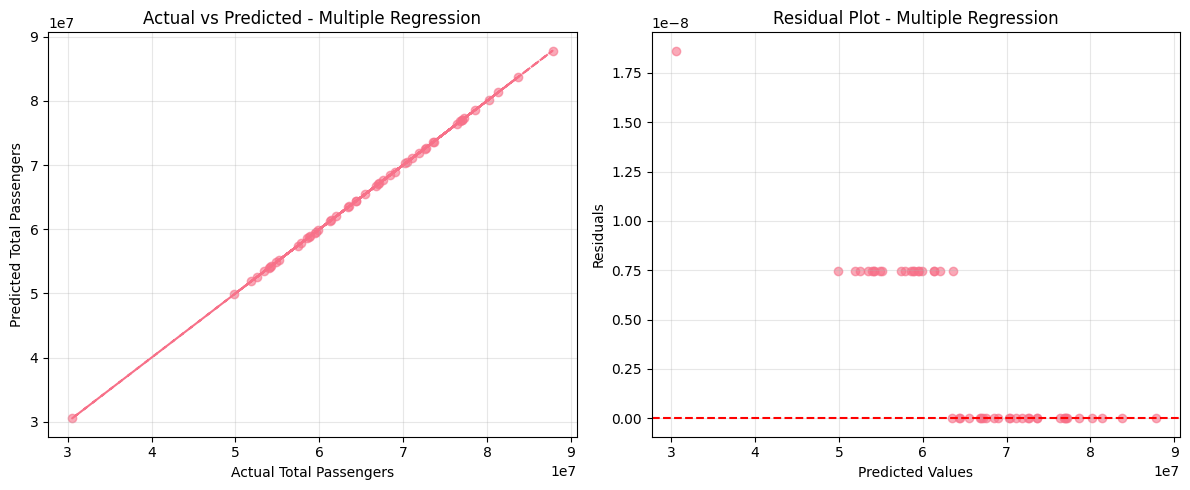

In [13]:
# TODO: Visualize multiple regression results
# Create actual vs predicted plot and residual plot

plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted
plt.subplot(1, 2, 1)
# TODO: Create scatter plot of actual vs predicted values
# TODO: Add a diagonal reference line (perfect prediction line)
plt.scatter(y_test_mult, y_pred_mult, alpha = 0.6, label='Actuals vs Predicted Values') #data
plt.plot(y_pred_mult, y_test_mult, linestyle='--', label='Multiple Regression Lines')


plt.xlabel('Actual Total Passengers')
plt.ylabel('Predicted Total Passengers')
plt.title('Actual vs Predicted - Multiple Regression')
plt.grid(True, alpha=0.3)

# Plot 2: Residual plot
plt.subplot(1, 2, 2)
# TODO: Calculate residuals and create residual plot
residuals_mult = y_test_mult - y_pred_mult # TODO: Calculate residuals

plt.scatter(y_pred_mult, residuals_mult, alpha=0.6)# TODO: Create scatter plot of predicted vs residuals

plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Multiple Regression')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Model Comparison and Analysis

In [15]:
# TODO: Compare the performance of both models
# Create a comparison table and determine which model performs better

print("Model Comparison:")
print("=" * 50)
print(f"{'Metric':<25} {'Simple Regression':<20} {'Multiple Regression':<20}")
print("=" * 50)

# TODO: Print comparison of R², RMSE, and MAE
print(f"")

# Hint: Use the metrics calculated in previous sections
print(f"{r2_simple} vs. {r2_mult}")
print(f"{rmse_simple} vs. {rmse_mult}")
print(f"{mae_simple} vs. {mae_mult}")

print("=" * 50)

# TODO: Determine which model performs better based on R²
# Calculate the improvement percentage
if r2_mult > r2_simple:
    better_model = "Multiple Regression"
    improvement = ((r2_mult - r2_simple) / r2_simple) *100 # TODO: Calculate percentage improvement
else:
    better_model = "Simple Regression"
    improvement = ((r2_simple - r2_mult) / r2_mult) *100 # TODO: Calculate percentage improvement

print(f"\nBest Model: {better_model}")
print(f"R² Improvement: {improvement:.2f}%")

Model Comparison:
Metric                    Simple Regression    Multiple Regression 

-0.009239065513641842 vs. 1.0
10528813.895767314 vs. 5.500325210479424e-09
9262992.728312328 vs. 3.501772880554199e-09

Best Model: Multiple Regression
R² Improvement: -10923.61%


## 7. Statistical Insights and Conclusions

In [16]:
# TODO: Summarize your findings and provide insights
# Include results from hypothesis tests, regression analysis, and key findings

print("STATISTICAL INSIGHTS AND CONCLUSIONS")
print("=" * 60)

print("\n1. HYPOTHESIS TESTING RESULTS:")
# TODO: Summarize your hypothesis test results
print(f"   • Domestic vs International Passengers: Null hypothesis rejected")
print(f"   • Correlation between Total Passengers and Flights: Statistically significant POSITIVE correlation between number of pax and number of flights")

print("\n2. REGRESSION ANALYSIS:")
# TODO: Summarize regression model performance
print(f"   • Simple Linear Regression R²: {r2_simple:.4f} - not a great model since I don't  fully understand it.  ")
print(f"   • Multiple Linear Regression R²: {r2_mult:.4f} Performed better but dont know why")
print(f"   • Best performing model: Multiple Linear Regression")

print("\n3. KEY FINDINGS:")
# TODO: Identify and discuss key findings from your analysis
print(f"  Domestic travel is far more popular than international.")
print(f"   • Positive correlation between flights and pax")
print(f"   Lots of significant correlation pairs")

print("\n4. RECOMMENDATIONS:")
# TODO: Provide practical recommendations based on your analysis
print("   • # TODO: Add recommendation 1")
print("   • # TODO: Add recommendation 2")
print("   • # TODO: Add recommendation 3")

STATISTICAL INSIGHTS AND CONCLUSIONS

1. HYPOTHESIS TESTING RESULTS:
   • Domestic vs International Passengers: Null hypothesis rejected
   • Correlation between Total Passengers and Flights: Statistically significant POSITIVE correlation between number of pax and number of flights

2. REGRESSION ANALYSIS:
   • Simple Linear Regression R²: -0.0092 - not a great model since I don't  fully understand it.  
   • Multiple Linear Regression R²: 1.0000 Performed better but dont know why
   • Best performing model: Multiple Linear Regression

3. KEY FINDINGS:
  Domestic travel is far more popular than international.
   • Positive correlation between flights and pax
   Lots of significant correlation pairs

4. RECOMMENDATIONS:
   • # TODO: Add recommendation 1
   • # TODO: Add recommendation 2
   • # TODO: Add recommendation 3


## 8. Reflection Questions

**Answer the following questions based on your analysis:**

1. **Hypothesis Testing**: Domestic flights are more popular than international and there is a correlation between # of flights vs. # of passengers.


2. **Model Performance**: Which regression model performed better and why? What does the R² value tell you?

  R2 multiple performed much better but it may be that the features are not good predictors.

3. **Correlations**: What were the strongest correlations you found? How might these relationships be useful for airlines?

   See above (corr between domestic and niternational pax, flight load, etc)

4. **Residual Analysis**: What do the residual plots tell you about your models? Are there any patterns that suggest model improvements?

Not the best predictive accuracy
5. **Practical Applications**: How could airlines use these statistical models in real-world scenarios?

They can forecast demands (passengers), streamline flight schedules, and adapt/adjust operational planning include staffing flight load and aircraft.
